In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def possible_change(state, i, j):
    return (i == 0 or not state[i - 1, j]) and (j == 0 or not state[i, j - 1]) and \
    (i == state.shape[0] - 1 or not state[i + 1, j]) and \
    (j == state.shape[1] - 1 or not state[i, j + 1])

def change_set (state):
    set = []
    for i in range (state.shape[0]):
        for j in range (state.shape[1]):
            if possible_change(state, i, j) or state[i,j]:
                set.append((i,j))
    return set
                           
def step (state):
    set = change_set(state)
    step = set[np.random.randint(0, len(set))]
    next_state = np.array(state)
    next_state[step[0], step[1]]= not state[step[0], step[1]]
    next_set = change_set(next_state)
    return next_state if np.random.uniform() < len(set) / len(next_set) else state


In [3]:
N = 8
state = np.zeros((N,N)).astype('bool')
sample = []
if state.size > 0:
    for i in range(10000):
        sample.append(state.sum())
        state = step(state)

np.array(sample).mean()

15.287

## Проверка стационарности

In [13]:
def g_test(x, start=0.4, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

In [14]:
g_test(sample[1000:])

Ttest_indResult(statistic=0.9903120907576611, pvalue=0.32205175264463204)

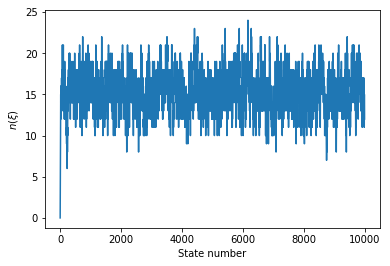

In [6]:
plt.plot(sample)
plt.xlabel("State number")
plt.ylabel("$ n(\\xi) $")
plt.show()

#### гипотезу стационарности не отвергаем, статистика t-критерия Стюдента > 0,1

# График распределения  n(ξ)

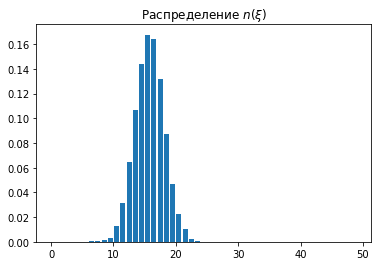

In [22]:
plt.hist(sample, bins=np.arange(50),  rwidth=0.8, density=True)
plt.title("Распределение $ n(\\xi) $")
plt.show()